# Optical Imagery

This resource will be updated on 8/28, 9/4, and 9/11.

The most familiar type of data collected by satellites is **optical imagery** - measurements of electromagnetic radiation leaving the Earth in visible or near-visible (infrared) portions of the spectrum. Optical imagery are typically *passive* sensors meaning they rely on energy provided by the sun, rather than emitting their own energy to illuminate the Earth's surface. In this page, we will explore the data collected by optical satellite and see a few examples of commercially-available satellite products.

To begin, let's import some Python packages to enable our exploration:

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## Images and Data
Before diving into some optical satellite data, first let's explore the organization of a typical image storing data. This will provide some context for the organization of optical satellite data.

### Digital Images
Images stored in a digital format are stored with 3-4 numbers describing the constituent colors that make up a given color we see. For example, consider the following image of the progress pride flag, which we read in with `PIL` and `numpy`:

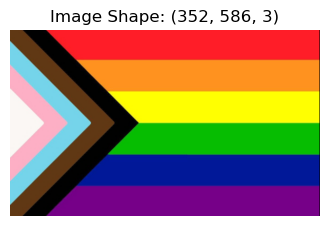

In [3]:
# read in the image
im = Image.open('../images/progress_pride_flag.jpg')
im = np.asarray(im)

# show the image with its size
fig = plt.figure(figsize=(4,3))
C = plt.imshow(im)
plt.axis('off')
plt.title('Image Shape: '+str(np.shape(im)))
plt.show()

As we can see in the plot above, the `progress_pride_flag.jpg` image is stored with three dimensions: the number of pixels in the x- and y-directions (586 and 352, respectively) as well as a third dimension for each consitutent color. For `jpg` images, these layers correspond to the red, green, and blue colors used to make up the colors on a computer screen. Other coloring schemes use different types of color combinations - for example, printers use cyan, maroon, and yellow to construct colors in a similar fashion. We can observe these constituent colors by plotting their intensity individually:

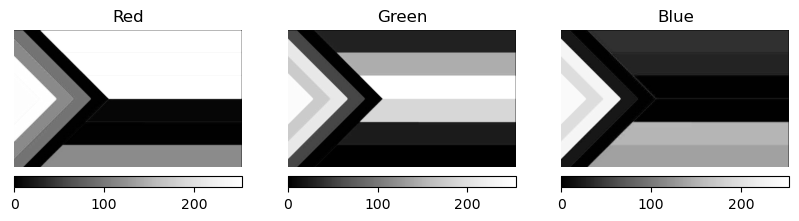

In [3]:
plt.figure(figsize=(10,3))

plt.subplot(1,3,1)
C = plt.imshow(im[:,:,0],cmap='Greys_r',vmin=0, vmax=254)
plt.axis('off')
plt.colorbar(C,pad=0.04,orientation='horizontal')
plt.title('Red')

plt.subplot(1,3,2)
C = plt.imshow(im[:,:,1],cmap='Greys_r',vmin=0, vmax=254)
plt.axis('off')
plt.colorbar(C,pad=0.04,orientation='horizontal')
plt.title('Green')

plt.subplot(1,3,3)
C = plt.imshow(im[:,:,2],cmap='Greys_r',vmin=0, vmax=254)
plt.axis('off')
plt.colorbar(C,pad=0.04,orientation='horizontal')
plt.title('Blue')

plt.show()

### Optical Satellite Images
Much like digital images, satellite images are composed of separate layers called **bands** that store information about a given **scene**. However, unlike digital images using red, green, and blue pixel values to reconstruct a given image, optical satellite images are composed of measured reflectances and/or radiances at different wavelengths of the electro-magnetic spectrum.

As an example, let's look at 10 bands measured on 1 June 2024 by the Landsat 8 satellite over the Monterey Bay area in California:

```{image} ../images/monterey_landsat_bands.png
:alt: Landsat 8 Band Example for Monterey Bay
:align: center
```

In the above set of images, we can see a "Natural Color" image of the scene showing Monterey Bay in the center in blue, the Santa Cruz mountains to the north in dark green, and an all-too-common scenario for residents of Monterey Bay: a band of coastal fog enshrouding Monterey to the south as as well as Salinas and Watsonville to the east.

By looking at the individual bands (summarized below), we can see differences in reflectances and radiances between the different wavelengths. Unsuprisingly, bands 1-4 look similar to the "Natural Color" image since they were used to construct it. However, we start to see differences moving into the near- and shortwave-infrared where the land appears much light than the ocean due to the relatively higher emission of shortwave infrared from land compared to the ocean. In the shortwave bands, the low-level clouds remain brighter than the ocean and land. Band 9, also in the shortwave infrared shows evidence of a processing errors/artefacts. Bands 10 and 11, both thermal infrared bands as discussed in the next section, show differences in the low clouds - at these wavelengths, low level clouds act as insulators, absorbing infrared energy. As a result, the land and ocean, both of which emit infrared energy, appear brighter than the areas covered by low-level clouds. Note that band 8 is not depicted as it a "panchromatic band" generated by post-processing visible-wavelength bands to achieve a product with higher resolution.

This collection of images showcases the richness of information and physical processes that can be inferred from optical imagery.

## Optical Imagery Satellites

Optical imagery is one of the most common types of data collected by satellites. As a result, there are many different types of optical data with varying resolution and purposes. Here, we detail two U.S. satellite programs: the U.S. Landsat program started in 1972 and the Terra and Aqua satellites, launchd in 2002 and 2004, which carry the MODIS sensor.

#### The Landsat Program

The Landsat program began in 1972 with the launch of Landsat 1 and has continued, uninterrupted until present day. As of 2024, there are two operational Landsat satellites in orbit - Landsat 8 and 9. However, all data from previous Landsat satellites is freely available online. The following timeline outlines the approximate time intervals over which the Landsat satellites are in orbit.

```{image} ../images/timeline_landsat.png
:alt: Landsat 8 Timeline
:align: center
```

#### Landsat 8 and 9 Optical Bands

The Landsat 8 and 9 instruments collect optical data in the following spectral bands:

| Band Number | Band Name | Wavelength Range | Resolution |
| ----------- | --------- |----------------- | ---------- |
| 1  | Coastal Aerosol  | 0.43 - 0.45 $\mu$m  | 30 m|
| 2  | Blue  | 0.450 - 0.51 $\mu$m  | 30 m|
| 3  | Green  | 0.53 - 0.59 $\mu$m  | 30 m|
| 4  | Red  | 0.64 - 0.67 $\mu$m  | 30 m|
| 5  | Near-Infrared  | (0.85 - 0.88 $\mu$m  | 30 m|
| 6  | Shortwave Infrared (SWIR) 1 | 1.57 - 1.65 $\mu$m  | 30 m|
| 7  | Shortwave Infrared (SWIR) 2  | 2.11 - 2.29 $\mu$m  | 30 m|
| 8  | Panchromatic  | 0.50 - 0.68 µm  | 15 m|
| 9  | Cirrus  | 1.36 - 1.38 $\mu$m  | 30 m|

Unlike the 8-bit image of the progress pride flag above, which assigns each pixel a value in range 0-254, landsat imagery is stored as 16-bit images, with pixel values in range 0-65535. However, it should be noted that these values are scaled up from 12-bit images, which have a range of 0-4095.